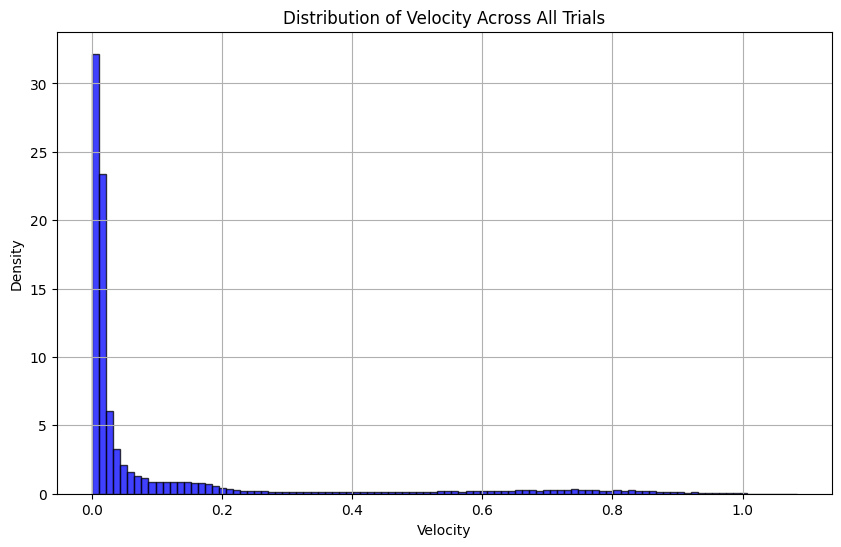

In [8]:
import os
import glob
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
# ------ USER PARAMETERS ------
base_folder = "/media/lolly/Bruh/WAYEEGGAL_dataset/WAYEEG_preprocessed"
patient = 'P1'

all_trials = []

patient_id = int(patient.strip("P"))
folder_path = os.path.join(base_folder,patient)
files = glob.glob(os.path.join(folder_path,f"HS_P{patient_id}_trial*.mat"))
for path in files:
    mat = sio.loadmat(path,squeeze_me=True,struct_as_record=False)
    kin = np.array(mat["trial_kin"])
    x = kin[3, ::3]
    y = kin[7, ::3]
    z = kin[11, ::3]

    velocity = np.sqrt(np.diff(x, prepend=x[0])**2 + np.diff(y, prepend=y[0])**2 + np.diff(z, prepend=z[0])**2)
    
    all_trials.append(velocity)



# plot distribution of velocity across all trials
plt.figure(figsize=(10, 6))
plt.hist(np.concatenate(all_trials), bins=100, density=True, alpha=0.75
            , color='blue', edgecolor='black')
plt.title('Distribution of Velocity Across All Trials')
plt.xlabel('Velocity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [5]:
files

[]